In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#import statsmodels.api as sm

In [ ]:
Bitcoin = "BTC-USD"
Datos_bit = yf.download(Bitcoin, start = '2020-01-01', end='2025-01-30')
Datos_bit = Datos_bit.dropna()

NameError: name 'yf' is not defined

In [ ]:
print(Datos_bit)

Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2020-01-01    7200.174316    7254.330566    7174.944336    7194.892090   
2020-01-02    6985.470215    7212.155273    6935.270020    7202.551270   
2020-01-03    7344.884277    7413.715332    6914.996094    6984.428711   
2020-01-04    7410.656738    7427.385742    7309.514160    7345.375488   
2020-01-05    7411.317383    7544.497070    7400.535645    7410.451660   
...                   ...            ...            ...            ...   
2025-01-25  104714.648438  105243.789062  104120.375000  104824.031250   
2025-01-26  102682.500000  105438.648438  102507.710938  104713.210938   
2025-01-27  102087.687500  103214.109375   97795.937500  102680.304688   
2025-01-28  101332.476562  103730.820312  100238.187500  102095.414062   
2025-01-29  103703.210938  104750.8046

<Axes: xlabel='Date'>

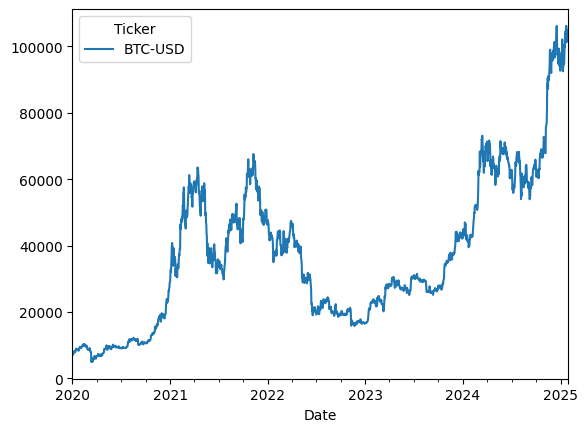

In [ ]:
Datos_bit['Close'].plot()

<Axes: xlabel='Date'>

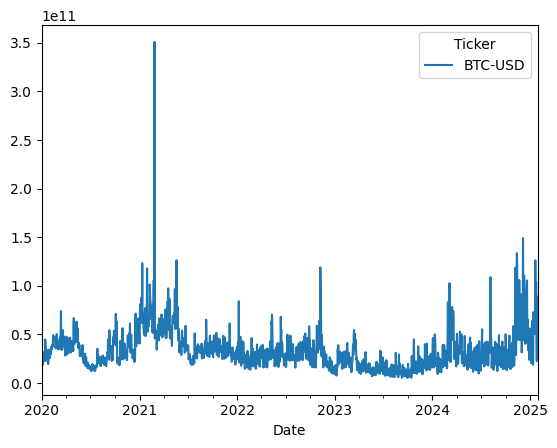

In [ ]:
Datos_bit['Volume'].plot()

In [ ]:
train_data = Datos_bit.iloc[:int(0.95*len(Datos_bit)),:]
test_data = Datos_bit['Close'][int(0.95*len(Datos_bit)):]

In [ ]:
features = ['Open', 'High', 'Low', 'Volume']
#features = ['Open', 'Volume']
target = 'Close'

In [ ]:
modelo = xgb.XGBRegressor()
modelo.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Precision del modelo

In [ ]:
acuracy = modelo.score(train_data[features], train_data[target])
acuracy
#print(f"Precisión del modelo: {acuracy * 100:.2f}%")

0.9999237656593323

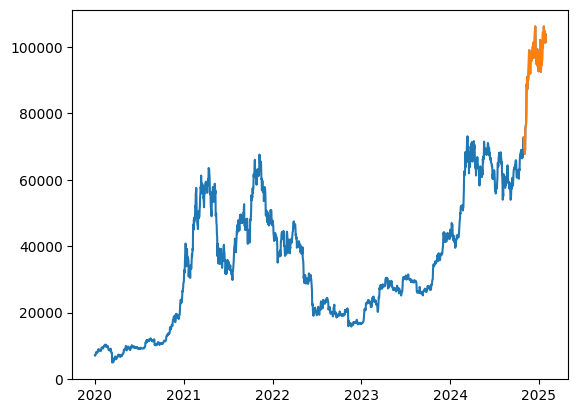

In [ ]:
plt.plot(Datos_bit['Close'])
#plt.plot(test_data)
plt.plot(test_data.index, test_data)
plt.show()

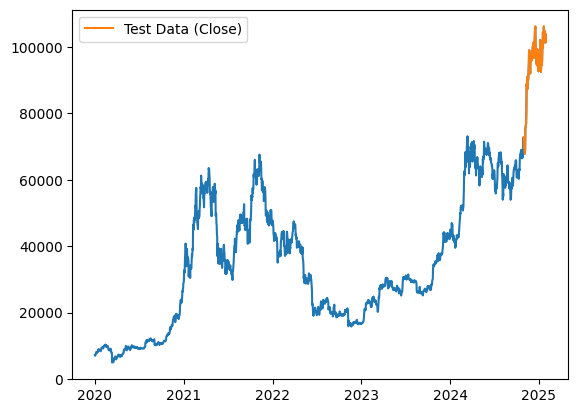

In [ ]:
plt.plot(Datos_bit['Close'])
#plt.plot(test_data)
# Plotting the index of the test_data Series and the test_data values
plt.plot(test_data.index, test_data, label='Test Data (Close)')
plt.legend() # Add a legend to distinguish the lines
plt.show()